In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.3
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_30_51_300_0.3_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_30_51_300_0.3_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	173890229.6616

Best Fitness:	48327007.0046
Solution:	100.0000
Diff:		48326907.0046

[0:12:19][----------] 1.96% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	187751372.2722

Best Fitness:	57223651.7089
Solution:	100.0000
Diff:		57223551.7089

[0:23:28][----------] 3.92% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	113808532.4971

Best Fitness:	40830883.3348
Solution:	100.0000
Diff:		40830783.3348

[0:34:31][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	113296401.4632

Best Fitness:	47476781.9039
Solution:	100.0000
Diff:		47476681.9039

[0:45:11][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	105567006.4661

Best Fitness:	45210253.3957
Solution:	100.0000
Diff:		45210153.3957

[0:55:18][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	162834557.7922

Best Fitness:	74709912.6758
Solution:	100.0000
Diff:		74709812.6758

[1:05:26][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	117804216.9319

Best Fitness:	37088002.5105
Solution:	100.0000
Diff:		37087902.5105

[1:15:36][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	93007761.4306

Best Fitness:	31618466.5117
Solution:	100.0000
Diff:		31618366.5117

[1:25:53][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	221170575.7271

Best Fitness:	59314801.1151
Solution:	100.0000
Diff:		59314701.1151

[1:35:53][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	173910940.4881

Best Fitness:	45672531.3365
Solution:	100.0000
Diff:		45672431.3365

[1:45:20][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	95127548.3356

Best Fitness:	41551845.4105
Solution:	100.0000
Diff:		41551745.4105

[1:54:49][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	124596907.9735

Best Fitness:	44872864.8343
Solution:	100.0000
Diff:		44872764.8343

[2:04:16][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	79449041.0141

Best Fitness:	22296923.3450
Solution:	100.0000
Diff:		22296823.3450

[2:13:31][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	199785565.4782

Best Fitness:	55297580.2658
Solution:	100.0000
Diff:		55297480.2658

[2:22:49][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	139755631.9667

Best Fitness:	41568599.4246
Solution:	100.0000
Diff:		41568499.4246

[2:32:09][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	148673798.0420

Best Fitness:	62313565.1679
Solution:	100.0000
Diff:		62313465.1679

[2:40:29][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	117320781.9942

Best Fitness:	38224019.3178
Solution:	100.0000
Diff:		38223919.3178

[2:48:56][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	56293767.8305

Best Fitness:	19456882.8813
Solution:	100.0000
Diff:		19456782.8813

[2:57:07][####------] 35.29% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	113839532.4821

Best Fitness:	29840215.2403
Solution:	100.0000
Diff:		29840115.2403

[3:05:12][####------] 37.25% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	122817213.2411

Best Fitness:	48869267.3120
Solution:	100.0000
Diff:		48869167.3120

[3:13:30][####------] 39.22% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	87939989.5906

Best Fitness:	38360430.5748
Solution:	100.0000
Diff:		38360330.5748

[3:21:34][####------] 41.18% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	122561681.5965

Best Fitness:	44705296.3309
Solution:	100.0000
Diff:		44705196.3309

[3:29:26][####------] 43.14% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	110336984.7877

Best Fitness:	39199555.9593
Solution:	100.0000
Diff:		39199455.9593

[3:37:01][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	84990119.0867

Best Fitness:	31356293.2799
Solution:	100.0000
Diff:		31356193.2799

[3:44:49][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	66254037.8478

Best Fitness:	26492159.5020
Solution:	100.0000
Diff:		26492059.5020

[3:52:44][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	85999034.6969

Best Fitness:	42483404.2569
Solution:	100.0000
Diff:		42483304.2569

[4:00:29][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	124071221.9815

Best Fitness:	41373899.0269
Solution:	100.0000
Diff:		41373799.0269

[4:07:58][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	126716327.6185

Best Fitness:	37868560.7489
Solution:	100.0000
Diff:		37868460.7489

[4:15:29][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	173073371.5475

Best Fitness:	51321021.8019
Solution:	100.0000
Diff:		51320921.8019

[4:23:19][######----] 56.86% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	91832526.6245

Best Fitness:	38659838.8245
Solution:	100.0000
Diff:		38659738.8245

[4:31:05][######----] 58.82% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	187757276.1486

Best Fitness:	62946340.3096
Solution:	100.0000
Diff:		62946240.3096

[4:38:41][######----] 60.78% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	97448461.4006

Best Fitness:	41557831.6221
Solution:	100.0000
Diff:		41557731.6221

[4:46:25][######----] 62.75% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	187121007.7726

Best Fitness:	88552126.5389
Solution:	100.0000
Diff:		88552026.5389

[4:53:43][######----] 64.71% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	79761920.4568

Best Fitness:	29704643.0077
Solution:	100.0000
Diff:		29704543.0077

[5:00:31][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	112484094.3899

Best Fitness:	49702342.1318
Solution:	100.0000
Diff:		49702242.1318

[5:07:21][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	122059823.2264

Best Fitness:	48600333.7117
Solution:	100.0000
Diff:		48600233.7117

[5:13:55][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	102838649.2920

Best Fitness:	28519993.9933
Solution:	100.0000
Diff:		28519893.9933

[5:20:08][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	117689173.2519

Best Fitness:	54423114.8519
Solution:	100.0000
Diff:		54423014.8519

[5:26:05][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	113414142.1549

Best Fitness:	27038885.4710
Solution:	100.0000
Diff:		27038785.4710

[5:31:52][########--] 76.47% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	146102043.9447

Best Fitness:	49923255.7213
Solution:	100.0000
Diff:		49923155.7213

[5:37:41][########--] 78.43% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	94568664.7428

Best Fitness:	34057749.0103
Solution:	100.0000
Diff:		34057649.0103

[5:43:27][########--] 80.39% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	71238144.5597

Best Fitness:	31745355.2417
Solution:	100.0000
Diff:		31745255.2417

[5:49:09][########--] 82.35% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	110178884.5018

Best Fitness:	33349712.9930
Solution:	100.0000
Diff:		33349612.9930

[5:54:52][########--] 84.31% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	145510960.0009

Best Fitness:	93049899.6245
Solution:	100.0000
Diff:		93049799.6245

[6:00:06][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	97371136.0275

Best Fitness:	39436925.6810
Solution:	100.0000
Diff:		39436825.6810

[6:05:17][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	120250900.6251

Best Fitness:	44775710.0926
Solution:	100.0000
Diff:		44775610.0926

[6:10:25][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	84855582.6247

Best Fitness:	35708257.6426
Solution:	100.0000
Diff:		35708157.6426

[6:15:37][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	100609233.8789

Best Fitness:	33356621.4924
Solution:	100.0000
Diff:		33356521.4924

[6:20:50][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	187900404.7863

Best Fitness:	79137047.4169
Solution:	100.0000
Diff:		79136947.4169

[6:25:52][##########] 96.08% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	125484474.2097

Best Fitness:	50595840.4605
Solution:	100.0000
Diff:		50595740.4605

[6:30:35][##########] 98.04% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	97010341.4480

Best Fitness:	32531220.2515
Solution:	100.0000
Diff:		32531120.2515

[6:35:29][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

6:35:29

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
293,8.490565e+07,1.608510e+08,8.807011e+07,1.062158e+08,1.288468e+08,1.062889e+08,8.909795e+07,1.343938e+08,1.186552e+08,9.678632e+07,...,7.449579e+07,1.275686e+08,8.189767e+07,9.488454e+07,1.259260e+08,1.393157e+08,1.380753e+08,1.603034e+08,6.255776e+07,50
294,8.490565e+07,1.608510e+08,8.807011e+07,1.062158e+08,9.467127e+07,1.036525e+08,8.909795e+07,1.343938e+08,1.186552e+08,9.678632e+07,...,7.449579e+07,1.275686e+08,8.189767e+07,9.488454e+07,1.259260e+08,1.204181e+08,1.380753e+08,1.603034e+08,6.255776e+07,50
295,8.490565e+07,1.608510e+08,8.807011e+07,1.062158e+08,9.467127e+07,1.036525e+08,8.909795e+07,1.343938e+08,1.186552e+08,9.678632e+07,...,7.449579e+07,1.275686e+08,8.189767e+07,9.488454e+07,1.259260e+08,1.204181e+08,1.380753e+08,1.603034e+08,6.255776e+07,50
296,8.490565e+07,1.608510e+08,8.807011e+07,1.062158e+08,9.467127e+07,1.036525e+08,8.909795e+07,1.343938e+08,1.186552e+08,9.678632e+07,...,7.449579e+07,1.275686e+08,8.189767e+07,9.488454e+07,1.259260e+08,1.204181e+08,1.380753e+08,1.236183e+08,6.255776e+07,50
297,8.490565e+07,1.608510e+08,8.807011e+07,1.062158e+08,9.467127e+07,1.036525e+08,8.909795e+07,1.343938e+08,1.186552e+08,9.678632e+07,...,7.449579e+07,1.275686e+08,8.189767e+07,9.488454e+07,1.259260e+08,1.204181e+08,1.380753e+08,1.236183e+08,6.255776e+07,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 48326907.0046466

Best error for run 1: 57223551.70889333

Best error for run 2: 40830783.33484072

Best error for run 3: 47476681.903895

Best error for run 4: 45210153.39566351

Best error for run 5: 74709812.6757774

Best error for run 6: 37087902.51046777

Best error for run 7: 31618366.5116981

Best error for run 8: 59314701.11511514

Best error for run 9: 45672431.33653166

Best error for run 10: 41551745.410517335

Best error for run 11: 44872764.83425689

Best error for run 12: 22296823.344952215

Best error for run 13: 55297480.265794836

Best error for run 14: 41568499.42459977

Best error for run 15: 62313465.167907014

Best error for run 16: 38223919.31779954

Best error for run 17: 19456782.881278552

Best error for run 18: 29840115.240319535

Best error for run 19: 48869167.31199676

Best error for run 20: 38360330.574789286

Best error for run 21: 44705196.33092104

Best error for run 22: 39199455.95934464

Best error for run 23: 31356193.27987319

Best error for run 24: 26492059.501981203

Best error for run 25: 42483304.2568795

Best error for run 26: 41373799.02692035

Best error for run 27: 37868460.748937726

Best error for run 28: 51320921.80193785

Best error for run 29: 38659738.82452411

Best error for run 30: 62946240.30963561

Best error for run 31: 41557731.62207185

Best error for run 32: 88552026.53892991

Best error for run 33: 29704543.007679164

Best error for run 34: 49702242.13178289

Best error for run 35: 48600233.71173961

Best error for run 36: 28519893.993314847

Best error for run 37: 54423014.85185936

Best error for run 38: 27038785.4710008

Best error for run 39: 49923155.72134787

Best error for run 40: 34057649.01033769

Best error for run 41: 31745255.2416821

Best error for run 42: 33349612.993049078

Best error for run 43: 93049799.62446927

Best error for run 44: 39436825.68097884

Best error for run 45: 44775610.092634045

Best error for run 46: 35708157.64257925

Best error for run 47: 33356521.492435373

Best error for run 48: 79136947.41694547

Best error for run 49: 50595740.46047329

Best error for run 50: 32531120.251486197

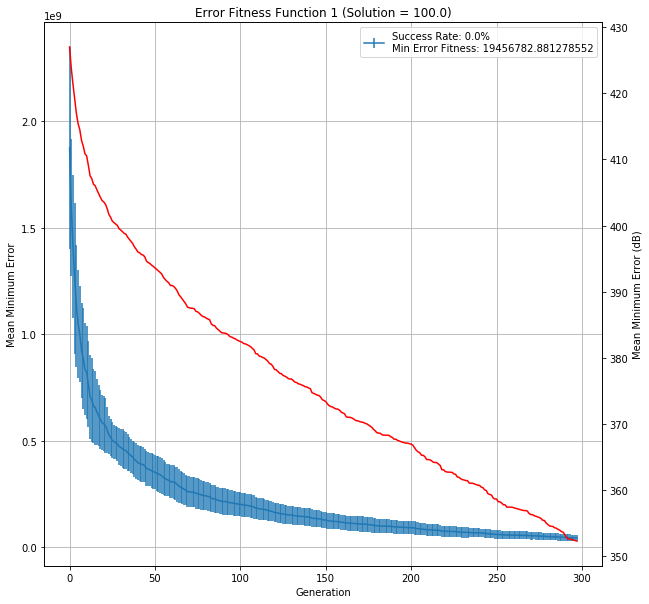

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_30_51_300_0.3_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,30,0.3,4.832691e+07,5.722355e+07,4.083078e+07,4.747668e+07,4.521015e+07,7.470981e+07,...,3.943683e+07,4.477561e+07,3.570816e+07,3.335652e+07,7.913695e+07,5.059574e+07,3.253112e+07,4.455476e+07,6:35:29,90000
